In [2]:
import numpy as np
import matplotlib.pyplot as plt

probably you need to install https://pypi.org/project/ipympl/
and restart your notebook

In [2]:
%matplotlib widget

ModuleNotFoundError: No module named 'ipympl'

In [3]:
!pip install ipympl

^C


In [4]:
%matplotlib widget

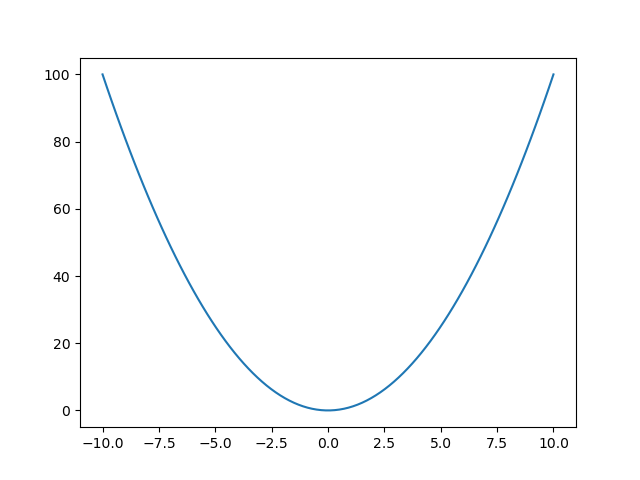

In [6]:
fig = plt.figure()
x=np.linspace(-10, 10, 100)
plt.plot(x, x**2)
plt.show()

FloatSlider(value=1.0, description='exponent:', max=10.0)

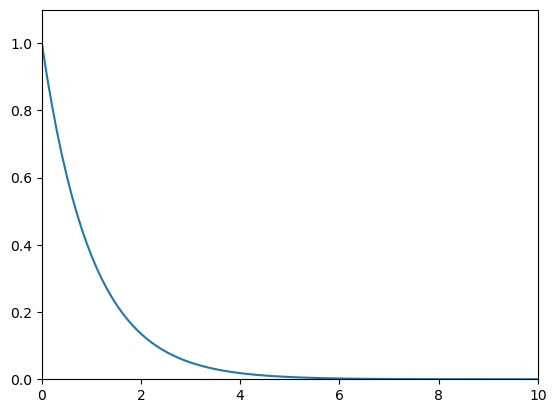

In [5]:
import ipywidgets as widgets
from IPython.display import display

# creazione slider per l'esponente
n_slider = widgets.FloatSlider(
    value=1,
    min=0,
    max=10,
    step=0.1,
    description='exponent:',
    continuous_update=True
)

# creazione figura e assi
fig, ax = plt.subplots()

# creazione del grafico vuoto
line, = ax.plot([], [])

# funzione per aggiornare il grafico in base al valore dello slider
def update_plot(n=1):
    x = np.linspace(0, 10, 100)
    y = np.exp(-n*x)
    line.set_data(x, y)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 1.1)
    fig.canvas.draw()

# collegamento della funzione di aggiornamento allo slider
widgets.interactive(update_plot, n=n_slider)

# mostrare lo slider e il grafico
display(n_slider)
plt.show()


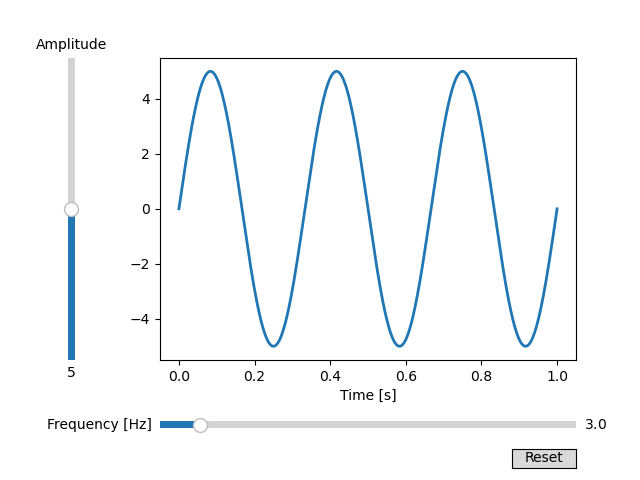

In [9]:
from matplotlib.widgets import Slider, Button


# The parametrized function to be plotted
def f(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

t = np.linspace(0, 1, 1000)

# Define initial parameters
init_amplitude = 5
init_frequency = 3

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = ax.plot(t, f(t, init_amplitude, init_frequency), lw=2)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

plt.show()